# **Pytorch Custom Data sets**

`Custom Datasets` : refers to datasets that do not fit into the standard pre defined formats offered by pytorch domain libraries like

torchvision, torchtext, torchaudio

Domain libraries

`torch.vision`
`torch.audio`
`torch.text`

In [87]:
import torch
from torch import nn

torch.__version__

'2.6.0+cu124'

In [88]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [89]:
# get data from github
import requests
from pathlib import Path
import zipfile

# path to data folder
data_path =Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists")
else:
  print(f"creating {image_path} directory")
  image_path.mkdir(parents=True, exist_ok=True)

# download data sets
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

# unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("unzipping data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists
unzipping data...


In [90]:
import os

def walk_through_dir(dir_path):
  "walks to data path returns its contents"
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)


there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak


In [91]:
# train and testing paths

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# visualize a image

 write code to :
* get all of the image paths
* pick a random image path using python random .choice()
* get the image class name

Random image path: data/pizza_steak_sushi/train/sushi/2175561.jpg
image class: sushi
image height: 384
Image width: 512


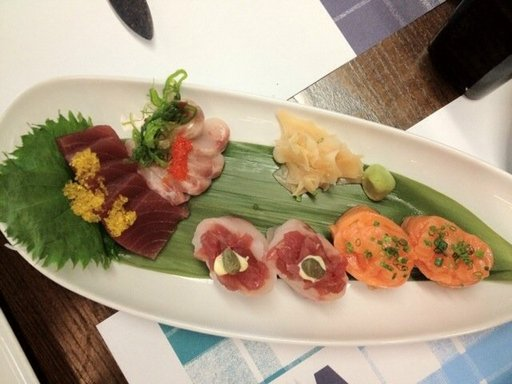

In [92]:
import random
from PIL import Image

#random.seed(42)

# get all the images
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list

# pick random image path
random_image_path = random.choice(image_path_list)

# get image class from path name (image class is name of the directory)
image_class = random_image_path.parent.stem

# open image
img = Image.open(random_image_path)

# print metadata
print(f"Random image path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image height: {img.height}")
print(f"Image width: {img.width}")
img

In [93]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
img_array = np.asarray(img)
plt.imshow(img_array)
plt.title(f"Image class: {image_class} | Image shape: {img_array.shape}")
plt.axis(False)

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

array([[[227, 225, 204],
        [227, 225, 204],
        [227, 225, 204],
        ...,
        [  4,   3,   0],
        [  5,   4,   0],
        [  5,   4,   0]],

       [[225, 223, 202],
        [226, 224, 203],
        [226, 224, 203],
        ...,
        [  4,   3,   0],
        [  4,   3,   0],
        [  5,   4,   0]],

       [[225, 223, 202],
        [225, 223, 202],
        [226, 224, 203],
        ...,
        [  4,   3,   0],
        [  4,   3,   0],
        [  5,   4,   0]],

       ...,

       [[205, 193, 167],
        [205, 193, 167],
        [205, 193, 167],
        ...,
        [ 95, 129, 156],
        [ 90, 124, 149],
        [ 90, 124, 149]],

       [[205, 193, 167],
        [204, 192, 166],
        [204, 192, 166],
        ...,
        [ 95, 126, 154],
        [ 89, 121, 146],
        [ 89, 121, 146]],

       [[205, 193, 167],
        [205, 193, 167],
        [205, 193, 167],
        ...,
        [ 90, 121, 149],
        [ 84, 116, 141],
        [ 84, 116, 141]]], dtype=uint8)
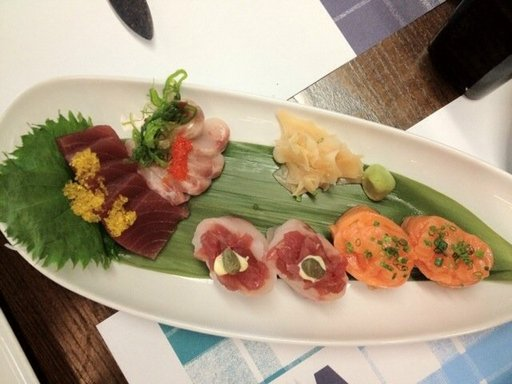

In [94]:
img_array

# Transorming data
* before we can use our image data with tensor
1. Turn target data into tensor
2. turn it into a torch.utils.data.Dataset


In [95]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [96]:
# transforming data with torch vision.transforms

# write a transform
data_transform = transforms.Compose([
    # resize the images
    transforms.Resize((64,64)),

    # flip images randomly on horizontal
    transforms.RandomHorizontalFlip(p=0.5),

    # turn images into torch tensors
    transforms.ToTensor()
])

In [97]:
data_transform(img)

tensor([[[0.8980, 0.9059, 0.9137,  ..., 0.0275, 0.0353, 0.0235],
         [0.9098, 0.9176, 0.9176,  ..., 0.0235, 0.0314, 0.0353],
         [0.9137, 0.9176, 0.9216,  ..., 0.0235, 0.0235, 0.0392],
         ...,
         [0.8196, 0.8392, 0.8431,  ..., 0.5176, 0.5216, 0.5059],
         [0.8157, 0.8235, 0.8431,  ..., 0.5490, 0.4902, 0.4078],
         [0.8118, 0.8157, 0.8314,  ..., 0.5294, 0.4196, 0.3647]],

        [[0.8902, 0.8980, 0.9059,  ..., 0.0039, 0.0118, 0.0118],
         [0.8902, 0.8980, 0.9020,  ..., 0.0039, 0.0118, 0.0196],
         [0.8902, 0.8941, 0.8980,  ..., 0.0039, 0.0039, 0.0157],
         ...,
         [0.7725, 0.7961, 0.8078,  ..., 0.6471, 0.6392, 0.6078],
         [0.7686, 0.7804, 0.8078,  ..., 0.6549, 0.6078, 0.5412],
         [0.7647, 0.7725, 0.8000,  ..., 0.6314, 0.5529, 0.5020]],

        [[0.8078, 0.8157, 0.8275,  ..., 0.0039, 0.0118, 0.0039],
         [0.8118, 0.8196, 0.8235,  ..., 0.0039, 0.0078, 0.0078],
         [0.8118, 0.8196, 0.8275,  ..., 0.0000, 0.0000, 0.

In [98]:
data_transform(img).dtype

torch.float32

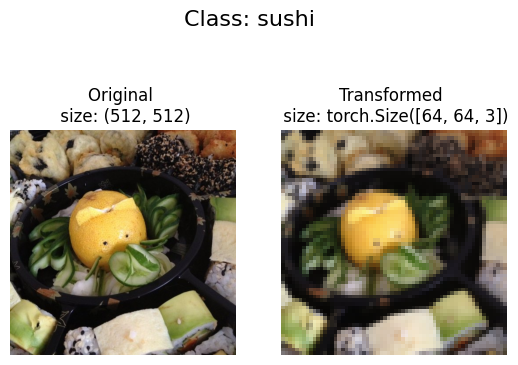

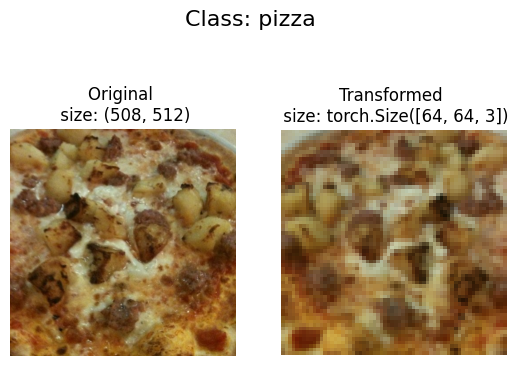

In [99]:
def plot_transformed_images(image_paths: list, transform, n=int, seed=42):
  " selects random images and loads transforms them then plots the orginal vs transformed version"
  if seed:
   random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \n size: {f.size}")
      ax[0].axis(False)

      # transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # we will need to change shape for matplotlib(c,h,w) ->(h,w,c)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \n size: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, data_transform, n=3,seed=42)

# loading image data using image folder

we can load image classification data using torchvision.datasets.ImageFolder()

In [100]:
from torchvision import datasets

# use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(train_dir, transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(test_dir, transform=data_transform,target_transform=None)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [101]:
# get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [102]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [103]:
# check the lengths of data sets
len(train_data), len(test_data)

(225, 75)

In [104]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [105]:
# index on train_data Dataset
img, label = train_data[0][0], train_data[0][1]
print(f"Image shape: {img.shape}")
print(f"Image label: {label}")
print(f"Class: {class_names[label]}")


Image shape: torch.Size([3, 64, 64])
Image label: 0
Class: pizza


In [106]:
class_names[label]

'pizza'

In [107]:
# rearrange the order of dimensions
img_permute = img.permute(1,2,0)
img_permute.shape

torch.Size([64, 64, 3])

In [108]:
img.shape

torch.Size([3, 64, 64])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

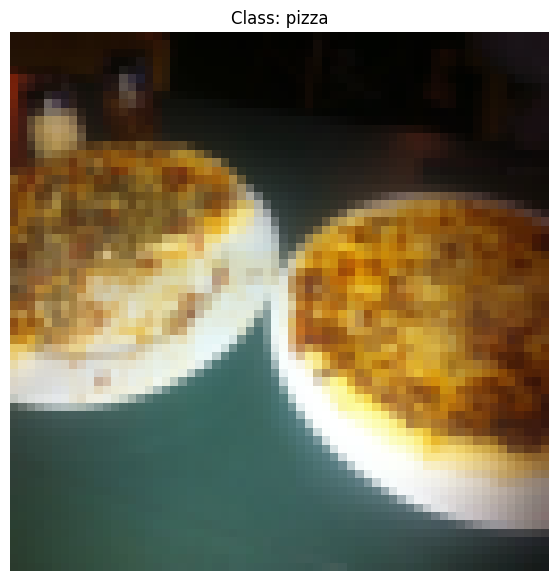

In [109]:
# plot image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"Class: {class_names[label]}")
plt.axis(False)

In [110]:
import os
os.cpu_count()

2

In [111]:
# turn data sets into data loaders
# data loader helps to turn out datasets into iterables
from torch.utils.data import DataLoader

BATCH=1
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH,
                              num_workers=os.cpu_count(), # toral cpus in a local machine
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader
#


(<torch.utils.data.dataloader.DataLoader at 0x7bf418380f50>,
 <torch.utils.data.dataloader.DataLoader at 0x7bf41830f050>)

In [112]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [113]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

# loading image data with a custom dataset

1. want to able to loaded images from file
2. want to able to get class names from dataset
3. want to able to get classes as dictionary from dataset

pros:
can create a dataset out of almost anything
not limited to pytorch prebuilt dataset Functions

cons:
using a custom datasets results in writing more code which could be prone to errors or performance issues




In [114]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List


In [115]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [116]:
# creating a helper function to get a class

target_directory =train_dir

class_name_found =sorted([entry.name for entry in os.scandir(target_directory) if entry.is_dir()])
class_name_found


['pizza', 'steak', 'sushi']

In [117]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [118]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
  """ find the classes folder name in target directory """
  # get class name by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())


  # raise error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Could not find any classes in {directory}")

  # create a dictionary of lndex labels
  class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}
  return classes,class_to_idx
  # assert

In [119]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# custom dataset to replicte Imagefolder
# to create own custom dataset we want

1. subclass `torch.utils.data.Dataset`
2. init class with target target_directory
3. create several attributes
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. create a function to `load_images()`
5. overwrite the`__len()__` method to return the length of our data
6. over write __getitem()__ method to return a given sample when passed as index

In [120]:
# custom data set
from torch.utils.data import Dataset

# sub class dataset
class ImageFolderCustom(Dataset):
  # init custom data set
  def __init__(self,
               target_dir: str,
               transform=None):

    # class attributes
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))

    self.transform = transform

    # create classes and class_idx
    self.classes, self.class_to_idx = find_classes(target_dir)


  def load_image(self, index: int) -> Image.Image:
    "load and return image given index"
    image_path = self.paths[index]
    return Image.open(image_path)

  # overwrite __len__()
  def __len__(self)->int:

    # return total numbers of sample
    return len(self.paths)

  # overwrite __getitem__() to return particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "return target sample at given index"
    img = self.load_image(index)
    class_name = self.paths[index].parent.stem # expects path in format : data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # transform image
    if self.transform:
      return self.transform(img), class_idx # return data, label(x,y)
    else:
      return img, self.class_idx # return untransformed imaeg and label


In [121]:
img, label =train_data[0]

img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [122]:
# create a transform
# Data augementation : technique to increase the size and diversity of a training dataset by applying various transformations to the existing data
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [123]:
# test out imagefoldercustom

train_data_custom = ImageFolderCustom(target_dir=train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir=test_dir, transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7bf418311c10>,
 <__main__.ImageFolderCustom at 0x7bf4184a93d0>)

In [124]:
len(train_data_custom), len(train_data)

(225, 225)

In [125]:
len(test_data_custom), len(test_data)

(75, 75)

In [126]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [127]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [128]:
# check for equality btw orginal imagefolder and imagefoldercustomdataset

print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)


True
True


# Create a function to visualize a random images

* take in a `Dataset` and num of  parameters as class name and how many images
* set random seed for reproducibility
* get a list of random sample indexes from target dataset
* setup a matplotlib plot
* loop through the random sample image and plot them with matplolin
* make sure the dimensions of our image sline up with maplotlib

In [129]:
# create a function
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n: int=10,
                          display_shape: bool=True,
                          seed : int=None):

  # adjust if n is too high
  if n>10:
    n=10
    display_shape=False

  # set the seed
  if seed:
    random.seed(seed)

  # get random indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # setup plot
  plt.figure(figsize=(16,8))

  # loop through random indexes and plot them with matplotlib
  for i, tar_sample in enumerate(random_samples_idx):
    img, label = dataset[tar_sample][0], dataset[tar_sample][1]

    # adjust tensor dimensions
    targ_image_adjust = img.permute(1,2,0) # changes the postion( colorchannel , height , width )--> ( height, width, colorchannel )

    # plot image
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    if classes:
      plt.title(f"class: {classes[label]}")
      if display_shape:
        plt.title(f"shape: {targ_image_adjust.shape}")


    plt.axis(False)



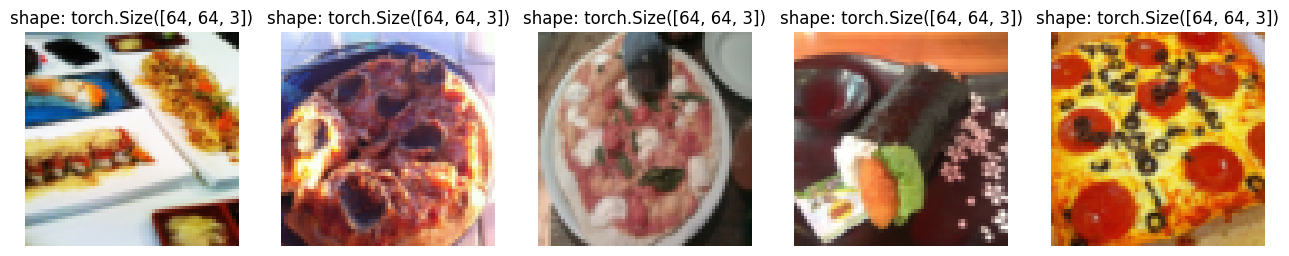

In [130]:
# display random images from the image folder

display_random_images(train_data,
                      classes=train_data_custom.classes,
                      n=5,
                      seed=42)

In [131]:
# custom loaded images to dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7bf41835ad10>,
 <torch.utils.data.dataloader.DataLoader at 0x7bf418381710>)

In [132]:
# get image and label

img_custom, label_custom = next(iter(train_dataloader_custom))

# get out the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# Other forms of transforms (Data augementation)

`Data Augmentation` : process of artificially adding the diversity of the dataset by using the existing data

In [133]:
# trival augment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [134]:
# all image paths

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/sushi/686426.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2017378.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3360207.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/169392.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/765684.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2019344.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/385154.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1615453.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/700405.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2720223.jpg')]

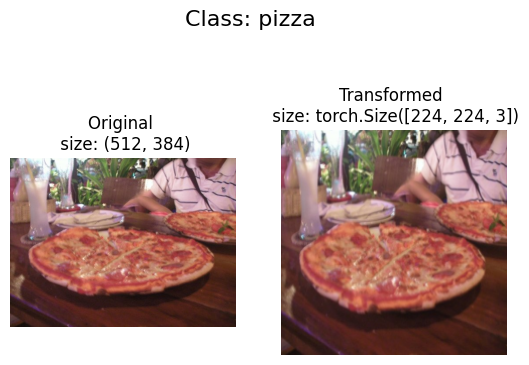

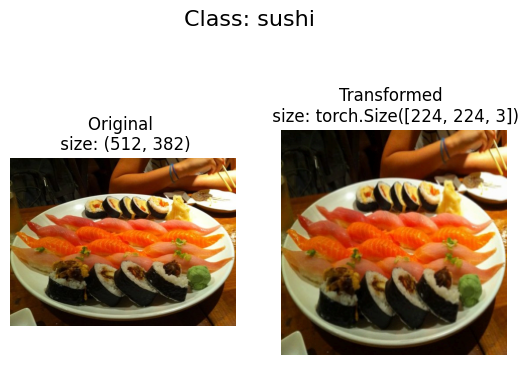

In [135]:
# plot random transformed images

plot_transformed_images(image_path_list, train_transform, n=3, seed=None)

# Model 0: TinyVGG without data augmentation

In [136]:
# creating transforms and loading data
# create a simple transform

simple_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [137]:
# load and transform data
from torchvision import datasets

train_data_sample = datasets.ImageFolder(train_dir, transform=simple_transforms)
test_data_sample = datasets.ImageFolder(test_dir, transform=simple_transforms)

# turn datasets into data loaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create a dataloader
train_dataloader_simple = DataLoader(train_data_sample,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(test_data_sample,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)



`Building model and evaluating`
03-pytorch-computer-vision-workflow.png


In [138]:
# create TinyVGG model
import torch.nn as nn

class TinyVGG(nn.Module):
   # model architecture copying tinyvgg from CNN explorer
   def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernal size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, # trick to find the size of the layer is to multiply with 2nd conv block layers output shape mul hiddenunits
                  out_features=output_shape)
    )

   def forward(self, x):
    x=self.conv_block_1(x)
   # print(x.shape)
    x=self.conv_block_2(x)
   # print(x.shape)
    x=self.classifier(x)
    #print(x.shape)

    return x

      # return self.classifier(self.conv_block_2(self.conv_block_1(x)))   # befefits for operator fusion



In [139]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3, # no of color channels in image
                  hidden_units=10,
                  output_shape=len(train_data.classes))

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [140]:
# try a forward pass on a single image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [141]:
# try a forward pass
model_0(image_batch)


tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02


# use `torchinfo` to get an idea of the shapes going through our model

* printing out model shapes of our data through the forward() MethodDescriptorType

In [142]:
# install torchinfo if its is not avaliable , import it if it is


from torchinfo import summary
summary(model_0, input_size=(32,3,64,64)) # summarizes the models architecture and no of parameters are acquired from the given model

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

In [143]:
summary(model_0, input_size=(1,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

# create train and test loop functions

* `train_step` takes in a model and dataloader and trains the model on the dataloader
* `test_step` takes in a model and dataloader and evaluates the model on dataloader

In [144]:
# creating a loss function and optimizer

loss_fn =nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [145]:
# train_step function

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer):

  # put the model in the train mode
  model.train()

  # setup train loss and accuracy values
  train_loss, train_acc = 0,0

  # loop through data loader
  for batch, (X,y) in enumerate(dataloader):
    # forward pass
    y_pred = model(X) # outputs raw logits

    # calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # optimize
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    #calculate accuracy
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # adjust matrix to avg loss and accuracy
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [146]:
# create teststep function

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer:torch.optim.Optimizer):
  # evaluate the model
  model.eval()

  # setup test loss and accuracy values
  test_loss, test_acc = 0,0

  with torch.inference_mode():

    for batch, (X,y) in enumerate(dataloader):
      # forward pass
      y_pred = model(X)

      # calculate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss.item()

      # calculate accuracy
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      test_acc += (y_pred_class==y).sum().item()/len(y_pred)

    # adjust matrix to avg loss and accuracy
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return test_loss, test_acc

### Create a `train()` function to combine `train_step()` and `test_step()`

In [159]:
# building a train loop in an epoch range using train and test functions

from tqdm.auto import tqdm

# create a train function takes various parameters
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int=5):

  # create a empty record dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}

  # loop through training and testing no of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)

    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    optimizer=optimizer)

    # print out
    print(f"Epoch:{epoch+1} | Train loss:{train_loss:.4f} | Train acc:{train_acc:.4f} | Test loss:{test_loss:.4f} | Test acc:{test_acc:.4f}")

    # update results
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

# return the filled results
  return results


In [148]:
# Train and evaluate model
torch.manual_seed(42)

NUM_EPOCHS=5

# recreate a instance of tinyVGG
model_0 = TinyVGG(input_shape=3, # no of color channels in image
                  hidden_units=10,
                  output_shape=len(train_data.classes))

# loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001) # default parameter of lr for adam optimizer

# start timer
from timeit import default_timer as timer
start_time = timer()

# train model_0

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# end the timer
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:1 | Train loss:1.1063 | Train acc:0.3047 | Test loss:1.0983 | Test acc:0.3011
Epoch:2 | Train loss:1.0998 | Train acc:0.3281 | Test loss:1.0697 | Test acc:0.5417
Epoch:3 | Train loss:1.0869 | Train acc:0.4883 | Test loss:1.0808 | Test acc:0.4924
Epoch:4 | Train loss:1.0842 | Train acc:0.3984 | Test loss:1.0608 | Test acc:0.5833
Epoch:5 | Train loss:1.0662 | Train acc:0.4141 | Test loss:1.0654 | Test acc:0.5644
Total training time: 11.442 seconds


In [149]:
model_0_results

{'train_loss': [tensor(1.1063, grad_fn=<DivBackward0>),
  tensor(1.0998, grad_fn=<DivBackward0>),
  tensor(1.0869, grad_fn=<DivBackward0>),
  tensor(1.0842, grad_fn=<DivBackward0>),
  tensor(1.0662, grad_fn=<DivBackward0>)],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.3984375, 0.4140625],
 'test_loss': [1.0983205238978069,
  1.069690187772115,
  1.0807572205861409,
  1.0608318249384563,
  1.0653960307439168],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

# plot the loss curves of model0

`loss curve` : is a way of tracking your model progress over time




In [155]:
# get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [156]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """
  Plots training curves of a results dictionary.
  """
  loss = results['train_loss']
  test_loss = results['test_loss']

  # get the accuracy values of the results dictionary
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  epochs = range(len(results['train_loss']))

  # setup plot
  plt.figure(figsize=(15,7))

  # loss plot
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


  # accuaracy plot
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()


In [160]:
# plot_loss_curves(model_0_results)

# what should an ideal loss curve look like

in machine learning underfitting and overfitting refer to how well a model generalize to new unseen data


`Under fitting` : it occurs  when a model is too simple to capture the underlying patterns in the data

`Over fitting` : it happens when a model is too complex and learns the training data too well including noise and outliers

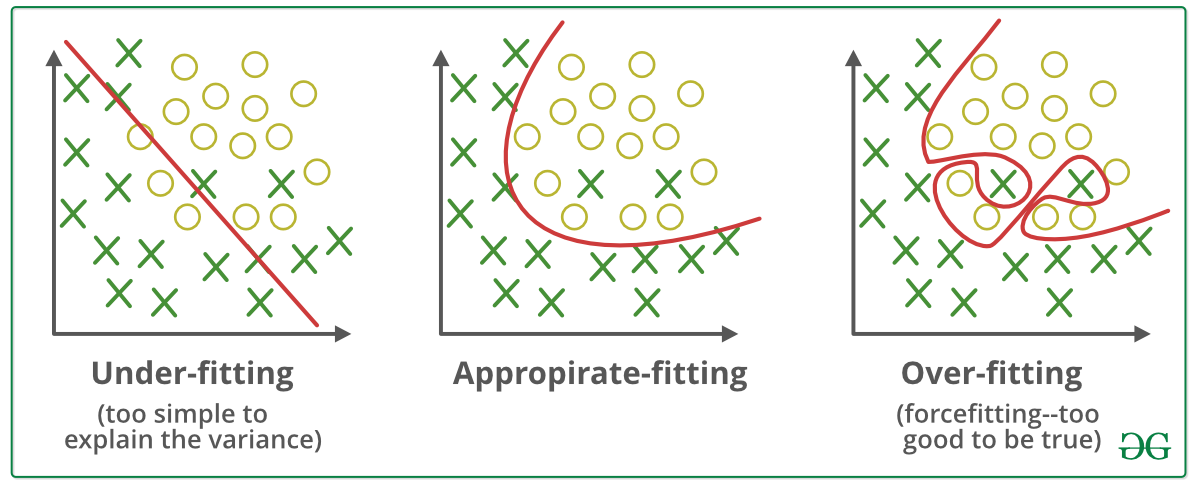

# deal with Overfitting
1. get more data
2. data augementation
3. use transfer learning (takign one models patterns to apply to another)
4. simplify model (removing some layers and complexity)
5. using learning rate decay (slowly decreasing the learning rate of an model over time)


# deal with underfitting
1. Adding more layers
2. Tweak the learning rate
3. train for longer
4. use transfer learning
5. use a larger network
6. use less regularization

In [163]:
# model 1: TinyVGG with data augementation
# create training transform with triviailaugment

from torchvision import transforms
train_transform_trivial= transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [164]:
# create train and test datasets and dataloader
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_transform_simple)

In [165]:
# dataset to dataloaders
import os
BATCH_SIZE =32
NUM_WORKERS =os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

# constructing and train model1

we will use same model architecture except changing the dataset


In [166]:
# create model_1

torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes))
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [167]:

torch.manual_seed(42)

NUM_EPOCHS =5

# setup loss and optimizer
loss_fn =nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# start timer
from timeit import default_timer as timer
train_time_start_model_1 = timer()

#train model1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-train_time_start_model_1}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:1 | Train loss:1.1049 | Train acc:0.2500 | Test loss:1.1019 | Test acc:0.2604
Epoch:2 | Train loss:1.0807 | Train acc:0.4258 | Test loss:1.1261 | Test acc:0.2604
Epoch:3 | Train loss:1.0712 | Train acc:0.4258 | Test loss:1.1593 | Test acc:0.2604
Epoch:4 | Train loss:1.1253 | Train acc:0.3047 | Test loss:1.1581 | Test acc:0.2604
Epoch:5 | Train loss:1.0865 | Train acc:0.4258 | Test loss:1.1554 | Test acc:0.3333
Total training time: 10.60486771900105


In [168]:
model_1_results

{'train_loss': [tensor(1.1049, grad_fn=<DivBackward0>),
  tensor(1.0807, grad_fn=<DivBackward0>),
  tensor(1.0712, grad_fn=<DivBackward0>),
  tensor(1.1253, grad_fn=<DivBackward0>),
  tensor(1.0865, grad_fn=<DivBackward0>)],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.1019279559453328,
  1.1260557969411213,
  1.159274657567342,
  1.1580672065416973,
  1.1554409265518188],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.3333333333333333]}

# ploting the loss curve

loss curve helps you evaluate your models preserve_format

In [170]:
plot_loss_curves(model_1_results)

# compare model results

evaluating a model experiment on their own its important to compare each Other

there a few different ways to do this:
1. Hard coding (what we are doing)
2. Py torch + Tensorboard
3. weight ^ biases
4. ML flow


In [178]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

# Making a prediction on custom data

In [180]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [181]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

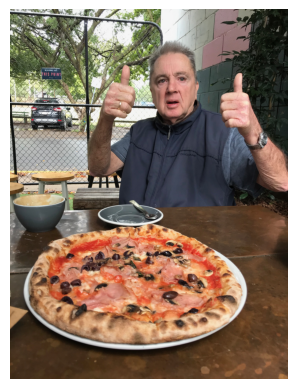

In [184]:
plt.imshow(custom_image_uint8.permute(1,2,0))
plt.axis(False)

In [ ]:
 # making a prediction on custom image
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.unsqueeze(dim=0))

In [190]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[2.3683e-03, 2.6605e-03, 2.7835e-03,  ..., 3.2295e-04,
          2.7682e-04, 2.1530e-04],
         [2.2453e-03, 2.5375e-03, 2.7835e-03,  ..., 3.2295e-04,
          2.7682e-04, 2.3068e-04],
         [1.9070e-03, 2.2453e-03, 2.6451e-03,  ..., 2.7682e-04,
          2.6144e-04, 2.3068e-04],
         ...,
         [1.1073e-03, 9.0734e-04, 6.9204e-04,  ..., 2.3376e-03,
          2.3068e-03, 2.2760e-03],
         [9.8424e-04, 8.4583e-04, 6.3053e-04,  ..., 2.3068e-03,
          2.2607e-03, 2.2145e-03],
         [9.8424e-04, 9.2272e-04, 7.0742e-04,  ..., 2.2914e-03,
          2.2453e-03, 2.1992e-03]],

        [[2.6298e-03, 2.9220e-03, 2.9681e-03,  ..., 3.3833e-04,
          2.9220e-04, 2.3068e-04],
         [2.5067e-03, 2.7989e-03, 2.9681e-03,  ..., 3.3833e-04,
          2.9220e-04, 2.4606e-04],
         [2.1684e-03, 2.5067e-03, 2.8297e-03,  ..., 2.9220e-04,
          2.7682e-04, 2.4606e-04],
         ...,
         [8.4583e-04, 6.4591e-04, 4.3060e-04,  ..., 1.6455

In [ ]:
 # making a prediction on custom image
model_1.eval()
with torch.inference_mode():
  model_1(custom_image)

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);